In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 变量需要初始化，常量不需要初始化

In [2]:
weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35),name="weights")

## 初始化，即计算所有的数据,在会话中运行

In [3]:
tf.global_variables_initializer

<function tensorflow.python.ops.variables.global_variables_initializer>

## 保存变量

In [4]:
saver = tf.train.Saver()#实例化一个变量
#在会话中调用
#saver.save(sess,'/addres/model.ckpt')
#恢复变量
#saver.restore(sess, "/addres/model.ckpt")

## 术语

In [5]:
type(weights)

tensorflow.python.ops.variables.Variable

In [6]:
mean_w=tf.reduce_mean(weights)
type(mean_w)

tensorflow.python.framework.ops.Tensor

In [7]:
init_=tf.global_variables_initializer()

In [8]:
with tf.Session() as sess:
    sess.run(init_)
    weights_np=weights.eval()
    sess_w=sess.run(mean_w)
    


In [9]:
sess_w

-0.00050525303

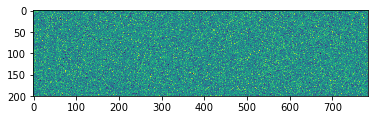

In [10]:
plt.imshow(weights_np.T)

In [11]:
g1=tf.Graph()#创建一个新的Graph,画布

with g1.as_default():
    a = tf.constant(1)
    b = tf.constant(2)

with tf.Graph().as_default() as g2:
    c = tf.constant(3)
    d = tf.constant(4)

with tf.Session(graph=g1) as sess1:
    print(sess1.run(a))

with tf.Session(graph=g2) as sess2:
    print(sess2.run(c+d) )

1
7


In [12]:
print(tf.get_default_graph)

<function get_default_graph at 0x000002327E1C3268>


In [13]:
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
help(input_data.read_data_sets)

Help on function read_data_sets in module tensorflow.contrib.learn.python.learn.datasets.mnist:

read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000, seed=None, source_url='https://storage.googleapis.com/cvdf-datasets/mnist/')



## onehot,假设有A,B,C,D四个选项，用onehot编码后就是对角矩阵，每行代表一个字母

In [15]:
np.diag([1,1,1,1])

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [16]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


### dir(mnist) >>>'count', 'index', 'test', 'train', 'validation'

### dir(mnist.test)>>>'epochs_completed', 'images',,'labels', 'next_batch', 'num_examples'

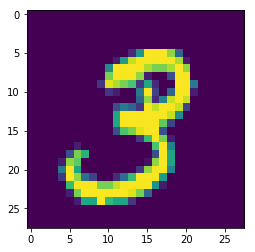

In [17]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [18]:
print('test:',mnist.test.images.shape,',   train:',mnist.train.images.shape)

test: (10000, 784) ,   train: (55000, 784)


In [19]:
print('test:',mnist.test.labels.shape,',   train:',mnist.train.labels.shape)

test: (10000, 10) ,   train: (55000, 10)


### 对于二维数据，第二个维度和最后一个维度是相同的。

In [20]:
 x = tf.constant([[1, 1, 1], [1, 1, 1]])
z=tf.reduce_sum(x,-1)
with tf.Session() as sess:
    print(sess.run(z))
    print(sess.run(tf.reduce_sum(x,1)))

[3 3]
[3 3]


In [21]:
help(tf.reduce_sum)

Help on function reduce_sum in module tensorflow.python.ops.math_ops:

reduce_sum(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
    Computes the sum of elements across dimensions of a tensor.
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keep_dims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keep_dims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` has no entries, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[1, 1, 1], [1, 1, 1]])
    tf.reduce_sum(x)  # 6
    tf.reduce_sum(x, 0)  # [2, 2, 2]
    tf.reduce_sum(x, 1)  # [3, 3]
    tf.reduce_sum(x, 1, keep_dims=True)  # [[3], [3]]
    tf.reduce_sum(x, [0, 1])  # 6
    ```
    
    Args:
      input_tensor: The tensor to reduce. Should have numeric type.
      axis: The dimensions to reduce. If `None` (th

In [22]:
# 一些参数
learning_rate = 0.01
training_times = 100
batch_size = 100
display_step = 20

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist图像数据 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 图像类别，总共10类

# 设置模型参数变量w和b
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [23]:
help(tf.nn.softmax)

Help on function softmax in module tensorflow.python.ops.nn_ops:

softmax(logits, dim=-1, name=None)
    Computes softmax activations.
    
    This function performs the equivalent of
    
        softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), dim)
    
    Args:
      logits: A non-empty `Tensor`. Must be one of the following types: `half`,
        `float32`, `float64`.
      dim: The dimension softmax would be performed on. The default is -1 which
        indicates the last dimension.
      name: A name for the operation (optional).
    
    Returns:
      A `Tensor`. Has the same type and shape as `logits`.
    
    Raises:
      InvalidArgumentError: if `logits` is empty or `dim` is beyond the last
        dimension of `logits`.



In [24]:
# 构建softmax模型
pred = tf.nn.softmax(tf.matmul(x, W) + b)

# 损失函数用cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# 梯度下降优化
'''return : An Operation that updates the variables in `var_list`.  If `global_step`
 |        was not `None`, that operation also increments `global_step`.'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init = tf.global_variables_initializer()

In [25]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for times in range(training_times):#100次
        avg_cost = 0.
        total_batch_times = int(mnist.train.num_examples/batch_size)#大约需要600次
        # 每一轮迭代total_batches
        for i in range(total_batch_times):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 使用batch data训练数据
            opti, c = sess.run([optimizer,cost], feed_dict={x: batch_xs,y: batch_ys})
            # 将每个batch的损失相加求平均
            avg_cost += c / total_batch_times
        # 每一轮打印损失
        if (times+1) % display_step == 0:
            print ("Epoch:", '%04d' % (times+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # 模型预测
    # tf.argmax(pred,axis=1)是预测值每一行最大值的索引，这里最大值是概率最大
    # tf.argmax(y,axis=1)是真实值的每一行最大值得索引，这里最大值就是1
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    weights=W.eval()
    # 对3000个数据预测准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0020 cost= 0.345428943
Epoch: 0040 cost= 0.312870572
Epoch: 0060 cost= 0.298222153
Epoch: 0080 cost= 0.289394280
Epoch: 0100 cost= 0.283186047
Optimization Finished!
Accuracy: 0.899


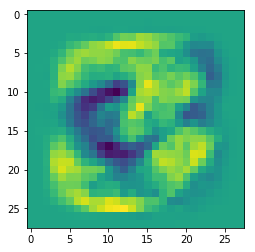

In [26]:
plt.imshow(weights[:,3].reshape(28,28))

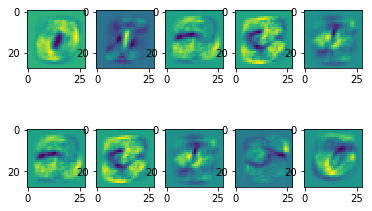

In [34]:
f,ax=plt.subplots(2,5)
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(weights[:,2*i+j].reshape(28,28))
     
            

## 从图像上看感觉预测的并不准